# Reviews Classification
- 1 - Preprocessing
- 2 - Simple EDA
- 3 - Classification

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import string
import re

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import tokenize

#sci-kit learn
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
# Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB

In [5]:
# Machine Learning tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [6]:
# Machine Learning metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

## 1 - Preprocessing :

In [7]:
# Download the Dataset : This dataset contains 1000 positive and 1000 negative processed reviews.
from nltk.corpus import movie_reviews

In [8]:
negative_fileids = movie_reviews.fileids('neg')
positive_fileids = movie_reviews.fileids('pos')

In [9]:
# Build the DataFrame
negative_features = pd.DataFrame(
    {'review':movie_reviews.raw(fileids=[f]),'label': 'neg'} for f in negative_fileids
)

In [10]:
positive_features = pd.DataFrame(
    {'review':movie_reviews.raw(fileids=[f]),'label': 'pos'} for f in positive_fileids
)

In [11]:
df = pd.concat([positive_features, negative_features], ignore_index=True)

In [12]:
df['class'] = np.where(df['label']=='pos',1,0)
df

,review,label,class
0,films adapted from comic books have had plenty...,pos,1
1,every now and then a movie comes along from a ...,pos,1
2,you've got mail works alot better than it dese...,pos,1
3,""" jaws "" is a rare film that grabs your atten...",pos,1
4,moviemaking is a lot like being the general ma...,pos,1
...,...,...,...
1995,"if anything , "" stigmata "" should be taken as ...",neg,0
1996,"john boorman's "" zardoz "" is a goofy cinematic...",neg,0
1997,the kids in the hall are an acquired taste . \...,neg,0
1998,there was a time when john carpenter was a gre...,neg,0


In [13]:
# Regular expression for finding contractions

contractions_dict = {"ain't": "are not","'s":" is","aren't": "are not"}
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [14]:
# Remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('subject')
stop_words.add('http')
stop_words.add('aa')
stop_words.add('aaa')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

In [15]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

### Preprocessing function :

In [16]:
def preprocessing(text):
    # 1)-Expand Contractions
    text = expand_contractions(text)
    # 2)-Lower Case
    text = text.lower()
    # 3)-Remove Punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '' , text)
    # 4)-Remove words and digits
    text = re.sub(r'\b[0-9]+\b\s*', '',text)
    # 5)-Remove stopwords
    text = remove_stopwords(text)
    # 6)-Lemmatization
    text = lemmatize_words(text)
    # 7)-Remove Extra Spaces
    text = re.sub(' +', ' ', text)
    return text

In [17]:
df['review'] = df['review'].apply(preprocessing)

In [18]:
df

,review,label,class
0,film adapted comic book plenty success whether...,pos,1
1,every movie come along suspect studio every in...,pos,1
2,youve got mail work alot better deserves order...,pos,1
3,jaw rare film grab attention show single image...,pos,1
4,moviemaking lot like general manager nfl team ...,pos,1
...,...,...,...
1995,anything stigma taken warning releasing simila...,neg,0
1996,john boorman zardoz goofy cinematic debacle fu...,neg,0
1997,kid hall acquired taste took least season watc...,neg,0
1998,time john carpenter great horror director cour...,neg,0


## 2 - Simple EDA :

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  2000 non-null   object
 1   label   2000 non-null   object
 2   class   2000 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 39.2+ KB


In [20]:
df.shape

(2000, 3)

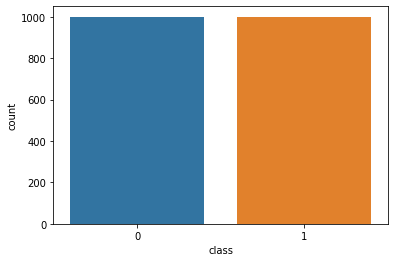

In [21]:
# Class
sns.countplot(df['class'])
plt.show()

Alors la Data set est equilibrée entre les 2 classes, positives et negatives.

## 3 - Classification :

## Generate the document term matrix

In [22]:
#*** Generate the document term matrix - train set ***

#import the CountVectorizer tool
from sklearn.feature_extraction.text import CountVectorizer

#instantiation of the objet
parseur = CountVectorizer(binary=True)

#create the document term matrix
X = parseur.fit_transform(df['review'])

In [23]:
X

<2000x40685 sparse matrix of type '<class 'numpy.int64'>'
	with 518614 stored elements in Compressed Sparse Row format>

In [24]:
#list of tokens
print(parseur.get_feature_names())

['0009f', '000acre', '000aweek', '000foot', '000paltry', '007esque', '00s', '10', '100m', '100minute', '101yearold', '102minute', '103minute', '104minute', '105minute', '106minute', '107yearold', '10a', '10day', '10foot', '10minute', '10story', '10th', '10week', '10year', '10yearold', '10yearolds', '11story', '11thhour', '11year', '11yearold', '120th', '125th', '12fingered', '12hour', '12minute', '12part', '12step', '12th', '12year', '12yearold', '13th', '13week', '13yearold', '14th', '14year', '14yearold', '1500s', '150th', '15foot', '15milliondollar', '15minutes', '15th', '15week', '15year', '15yearold', '1600s', '16mm', '16th', '16x9', '16yearold', '16yearolds', '1700s', '175million', '17day', '17th', '17year', '17yearold', '1800callatt', '1800s', '1830s', '18foothigh', '18plus', '18th', '18wheeler', '18yearold', '1900s', '1920s60s', '1930s', '1940s', '1940sstyle', '1950s', '1960s', '1970s', '1980s', '1990s', '1991france', '1997the', '1998s', '19months', '19th', '19thcentury', '19ye

In [25]:
#number of  tokens
print('Number of  tokens :',len(parseur.get_feature_names()))

Number of  tokens : 40685


In [26]:
#transform the sparse matrix into a numpy matrix
mdt = X.toarray()

#size of the matrix
print(mdt.shape)

(2000, 40685)


In [27]:
mdt

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
#frequency of the terms
freq_mots = np.sum(mdt,axis=0)#sum since we are using binary ponderation
#argmax
index = np.argsort(freq_mots)
#print the terms and their frequency
imp = {'terme':np.asarray(parseur.get_feature_names())[index],'freq':freq_mots[index]}
print(pd.DataFrame(imp).sort_values(by='freq', ascending=False))

           terme  freq
40684       film  1792
40683        one  1762
40682      movie  1642
40681       like  1490
40680  character  1431
...          ...   ...
12346      rueff     1
12347        rue     1
12348    rudnick     1
12349     rudner     1
0          0009f     1

[40685 rows x 2 columns]


### Dimensionality reduction 1 –  Terms frequency

In [29]:
#***** MIN FREQUENCY

#rebuild the parser with new options : min_df = 10
parseur = CountVectorizer(binary=True, min_df = 10)
X = parseur.fit_transform(df['review'])

#number of tokens
print('New features number : ',len(parseur.get_feature_names()))

X = X.toarray()

New features number :  7291


In [30]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
y = df['class']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [33]:
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape : (1500, 7291)
X_test shape : (500, 7291)
y_train shape : (1500,)
y_test shape : (500,)


In [34]:
# Scoring
def eval(model,X,y):
    print(str(model))
    print('-'*30)
    
    y_pred = model.predict(X)
    
    acc = accuracy_score(y, y_pred)
    print('Accuracy :',(acc*100).round(2),'%')
    print('-'*30)
    pre = precision_score(y, y_pred)
    print('Precision :',(pre*100).round(2),'%')
    print('-'*30)
    rec = recall_score(y, y_pred)
    print('Recall :',(rec*100).round(2),'%')
    print('-'*30)
    f1 = f1_score(y, y_pred)
    print('F1 score :',(f1*100).round(2),'%')
    print('-'*30)
    mat = confusion_matrix(y, y_pred)
    print('Confusion Matrix :\n',mat)

### Logistic regression

In [35]:
# Cross Validation
lr = LogisticRegression()
cv_mean = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy').mean()
print('cross validation score :',(cv_mean*100).round(2),'%')

cross validation score : 84.93 %


In [36]:
# Fit the model
lr.fit(X_train, y_train)

LogisticRegression()

In [37]:
# On train set
eval(lr,X_train,y_train)

LogisticRegression()
------------------------------
Accuracy : 100.0 %
------------------------------
Precision : 100.0 %
------------------------------
Recall : 100.0 %
------------------------------
F1 score : 100.0 %
------------------------------
Confusion Matrix :
 [[736   0]
 [  0 764]]


In [38]:
# On test set
eval(lr,X_test,y_test)

LogisticRegression()
------------------------------
Accuracy : 83.8 %
------------------------------
Precision : 80.16 %
------------------------------
Recall : 87.29 %
------------------------------
F1 score : 83.57 %
------------------------------
Confusion Matrix :
 [[213  51]
 [ 30 206]]


### Random Forest

In [39]:
# Cross Validation
rfc = RandomForestClassifier(min_samples_leaf = 10)
cv_mean = cross_val_score(rfc, X_train, y_train, cv=5, scoring='accuracy').mean()
print('cross validation score :',(cv_mean*100).round(2),'%')

cross validation score : 83.07 %


In [40]:
# Fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=10)

In [41]:
# On train set
eval(rfc,X_train,y_train)

RandomForestClassifier(min_samples_leaf=10)
------------------------------
Accuracy : 95.0 %
------------------------------
Precision : 94.92 %
------------------------------
Recall : 95.29 %
------------------------------
F1 score : 95.1 %
------------------------------
Confusion Matrix :
 [[697  39]
 [ 36 728]]


In [42]:
# On test set
eval(rfc,X_test,y_test)

RandomForestClassifier(min_samples_leaf=10)
------------------------------
Accuracy : 81.0 %
------------------------------
Precision : 76.01 %
------------------------------
Recall : 87.29 %
------------------------------
F1 score : 81.26 %
------------------------------
Confusion Matrix :
 [[199  65]
 [ 30 206]]


### Naive Bayes

In [43]:
# Cross Validation
nb = BernoulliNB()
cv_mean = cross_val_score(nb, X_train, y_train, cv=5, scoring='accuracy').mean()
print('cross validation score :',(cv_mean*100).round(2),'%')

cross validation score : 79.6 %


In [44]:
# Fit the model
nb.fit(X_train, y_train)

BernoulliNB()

In [45]:
# On train set
eval(nb,X_train,y_train)

BernoulliNB()
------------------------------
Accuracy : 90.47 %
------------------------------
Precision : 96.41 %
------------------------------
Recall : 84.42 %
------------------------------
F1 score : 90.02 %
------------------------------
Confusion Matrix :
 [[712  24]
 [119 645]]


In [46]:
# On test set
eval(nb,X_test,y_test)

BernoulliNB()
------------------------------
Accuracy : 79.8 %
------------------------------
Precision : 82.61 %
------------------------------
Recall : 72.46 %
------------------------------
F1 score : 77.2 %
------------------------------
Confusion Matrix :
 [[228  36]
 [ 65 171]]


### Conclusion : 
So Logistic Regression did a great job and it 's validated with 85% in accuracy, so it can be doployed.

In [47]:
model = lr

## Deployment

### Exemple :
<strong>Die hard : 'Bad review'</strong>
<br>
This film has almost everything that I despise. I do like the action, explosions, and Alan Rickman since he stars as Severus Snape in the seven Harry Potter flicks. Rickman is excellent at playing the bad guy. Bruce Willis thinks he is so cool; however, but nothing but a fool. So the two stars are for Rickman and the action. The subtraction of eight stars is for the ballooning votes that this movie has been given, the violence, the nudity, the vulgarity, Bruce Willis, the mindless acting by the majority, the length of the film, and finally not giving Rickman more lines. Yes, it’s a slight obsession with Rickman as it seems, but I had to think of eight reasons and ran out of ideas. So if you like or love this imbecilic claptrap, you will most likely disagree with me and jump to conclusions while forming stereotypes. I don’t blame you. I only wish Hollywood wouldn’t contribute to the degenerating of our civilization where people don’t care about humans they don’t know.


In [48]:
# Review to classify : Exemple of bad review of the film 'Die hard'
rev = "This film has almost everything that I despise. I do like the action, explosions, and Alan Rickman since he stars as Severus Snape in the seven Harry Potter flicks. Rickman is excellent at playing the bad guy. Bruce Willis thinks he is so cool; however, but nothing but a fool. So the two stars are for Rickman and the action. The subtraction of eight stars is for the ballooning votes that this movie has been given, the violence, the nudity, the vulgarity, Bruce Willis, the mindless acting by the majority, the length of the film, and finally not giving Rickman more lines. Yes, it’s a slight obsession with Rickman as it seems, but I had to think of eight reasons and ran out of ideas. So if you like or love this imbecilic claptrap, you will most likely disagree with me and jump to conclusions while forming stereotypes. I don’t blame you. I only wish Hollywood wouldn’t contribute to the degenerating of our civilization where people don’t care about humans they don’t know "

# Review preprocessing
rev = preprocessing(rev)

# Get its description
rev = parseur.transform([rev])

In [49]:
# which terms
print(np.asarray(parseur.get_feature_names())[rev.indices])

['acting' 'action' 'alan' 'almost' 'bad' 'blame' 'bruce' 'care'
 'civilization' 'conclusion' 'contribute' 'cool' 'disagree' 'don' 'eight'
 'everything' 'excellent' 'explosion' 'film' 'finally' 'flick' 'fool'
 'given' 'giving' 'guy' 'harry' 'hollywood' 'however' 'human' 'idea'
 'jump' 'know' 'length' 'like' 'likely' 'line' 'love' 'majority'
 'mindless' 'movie' 'nothing' 'nudity' 'obsession' 'people' 'playing'
 'potter' 'ran' 'reason' 'seems' 'seven' 'since' 'slight' 'star'
 'stereotype' 'think' 'two' 'violence' 'vote' 'willis' 'wish' 'yes']


In [50]:
# dense representation
rev = rev.toarray()
rev

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [51]:
classes = {0:'Negative Review', 1:'Positive Review'}

In [52]:
#prediction of the class 
pred = model.predict(rev)
print('Prediction :',classes[pred[0]])

Prediction : Negative Review


So the model had made a good prediction